In [1]:
from ISLP import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Auto = load_data('Auto')

In [3]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [5]:
Auto['mpg'].median()

22.75

In [6]:
Auto['mpg01'] = (Auto['mpg'] > Auto['mpg'].median()).astype(int)

In [7]:
Auto = Auto.drop('mpg', axis = 1)

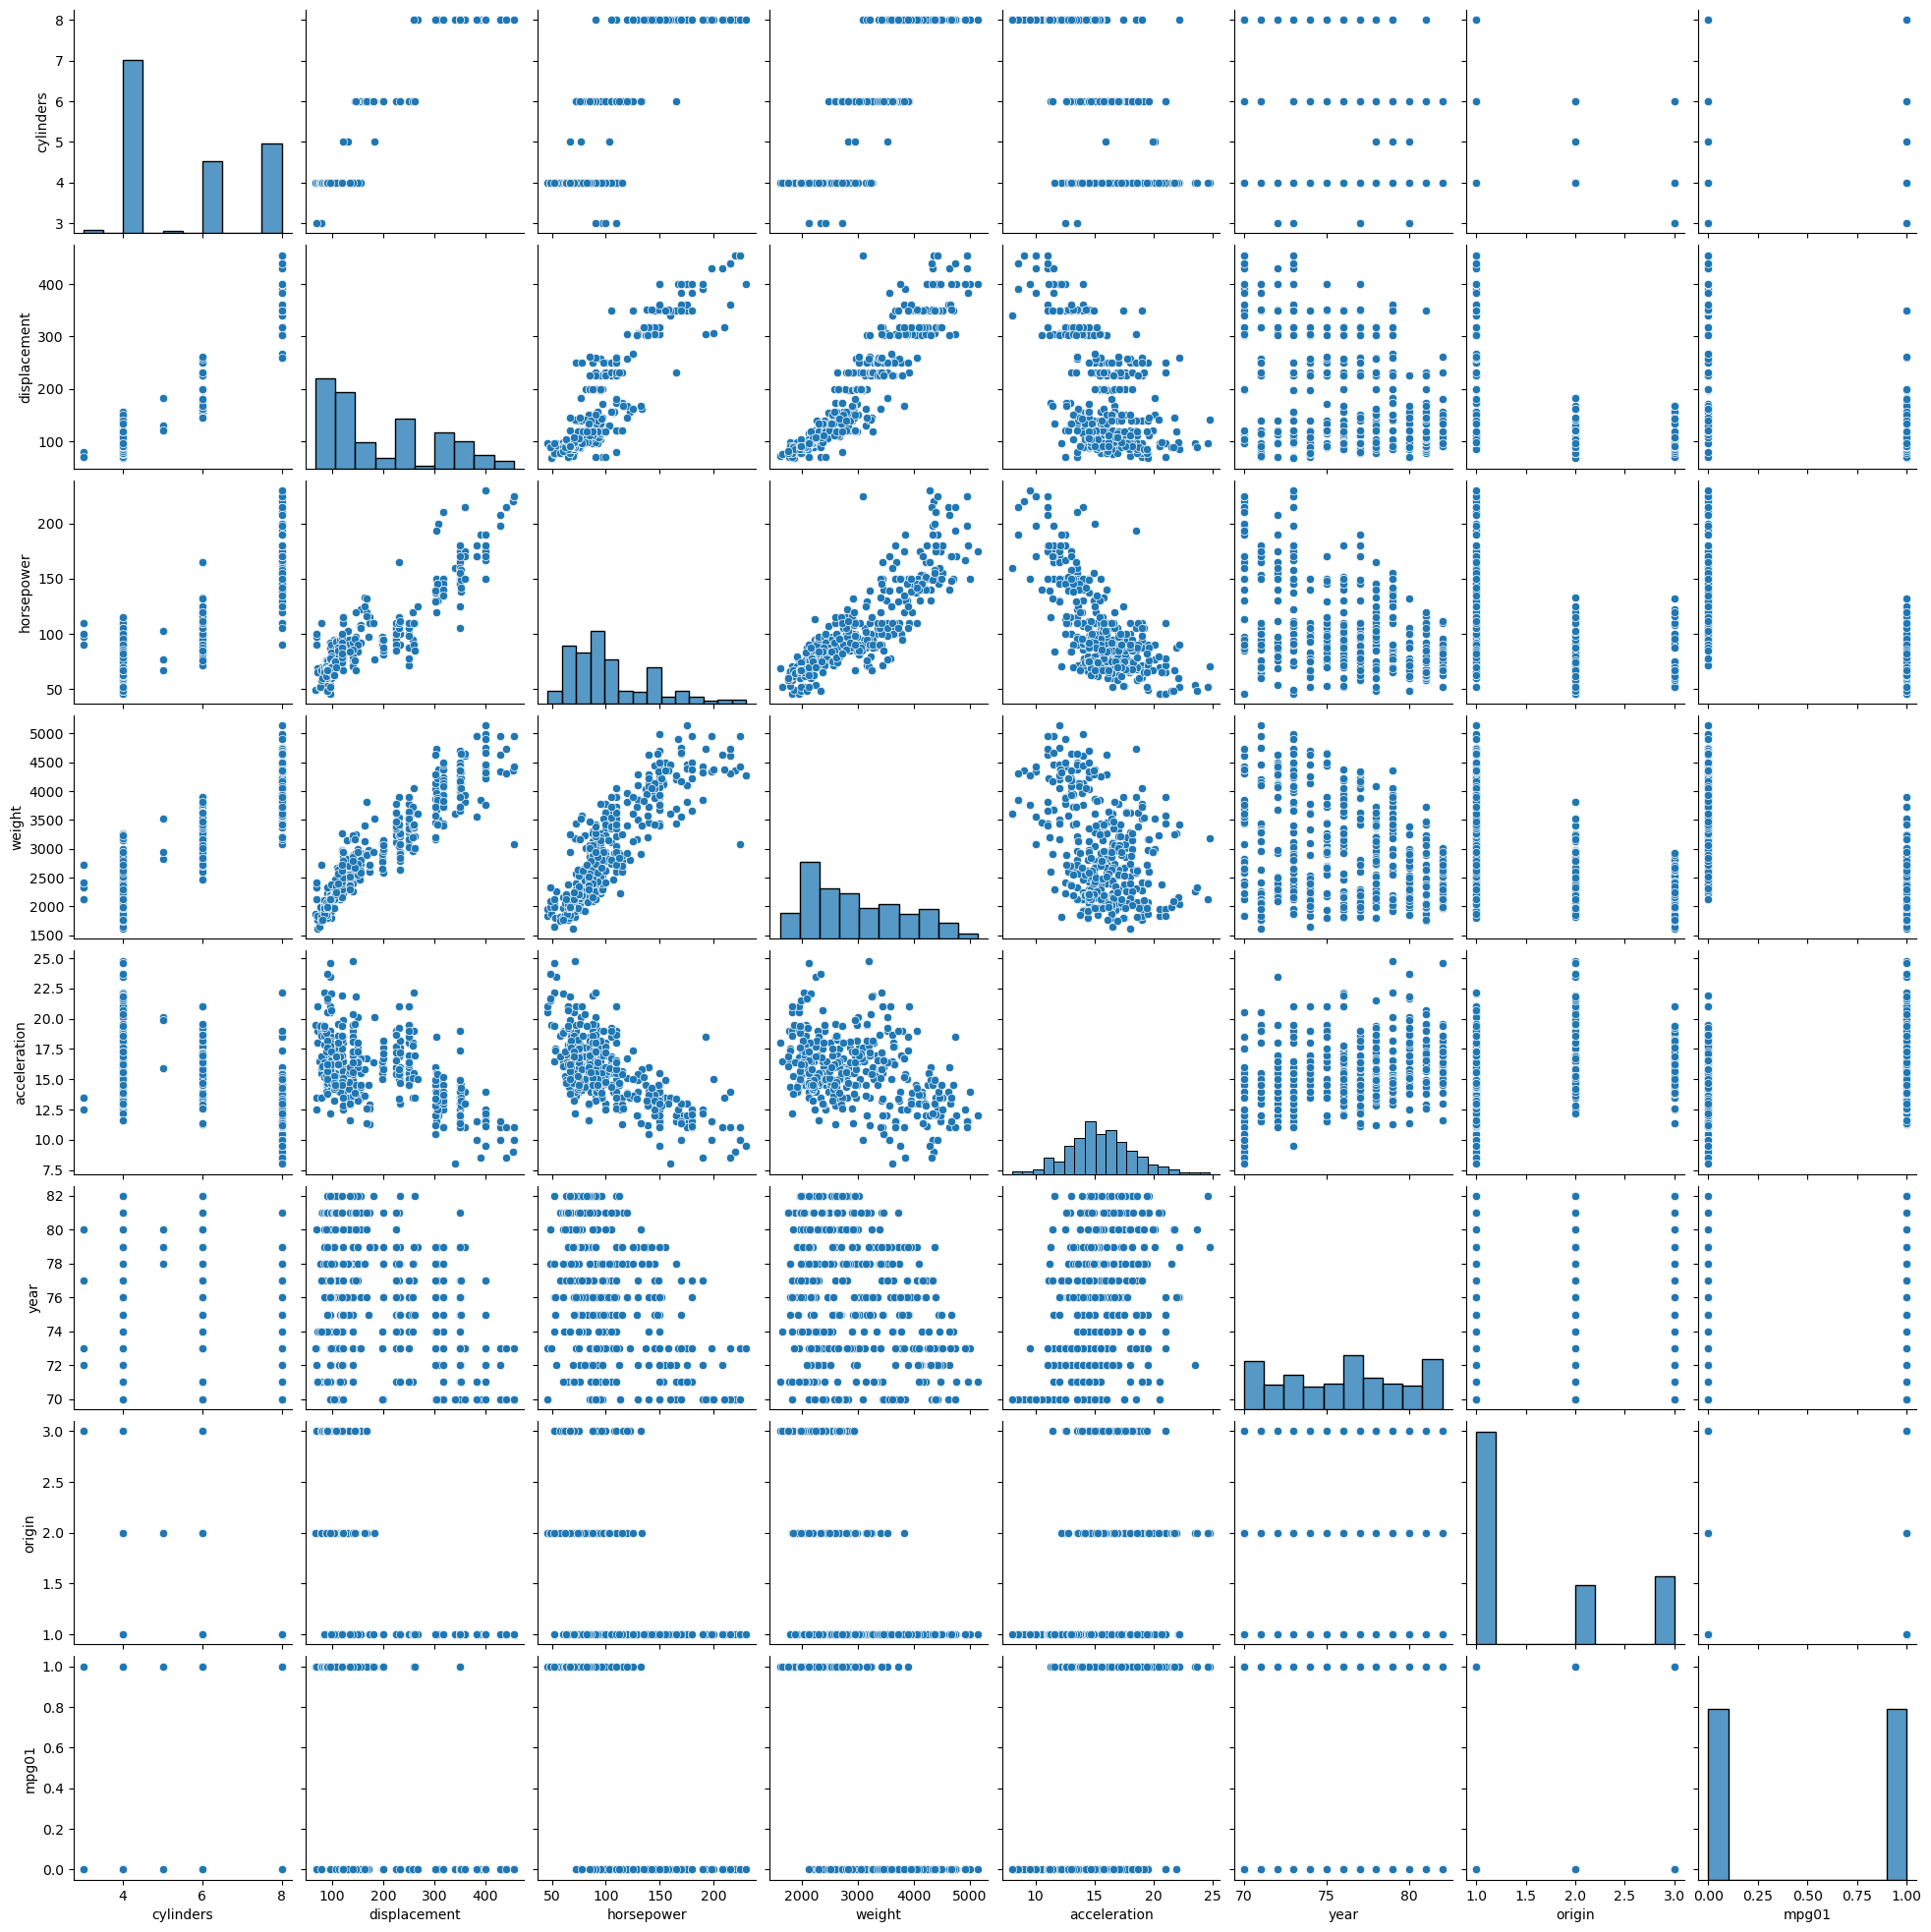

In [8]:
sns.pairplot(Auto);

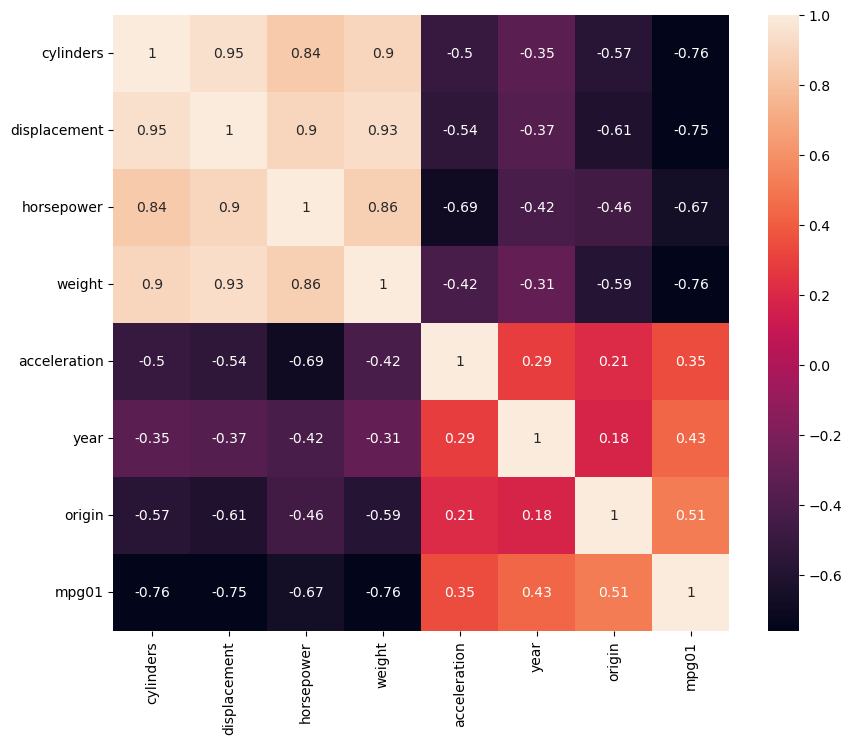

In [9]:
numeric_cols = Auto.select_dtypes(include = np.number).columns
plt.figure(figsize = (10, 8))
sns.heatmap(Auto[numeric_cols].corr(), annot = True, square = True);

In [10]:
Auto.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


<Axes: title={'center': 'mpg01'}, xlabel='year'>

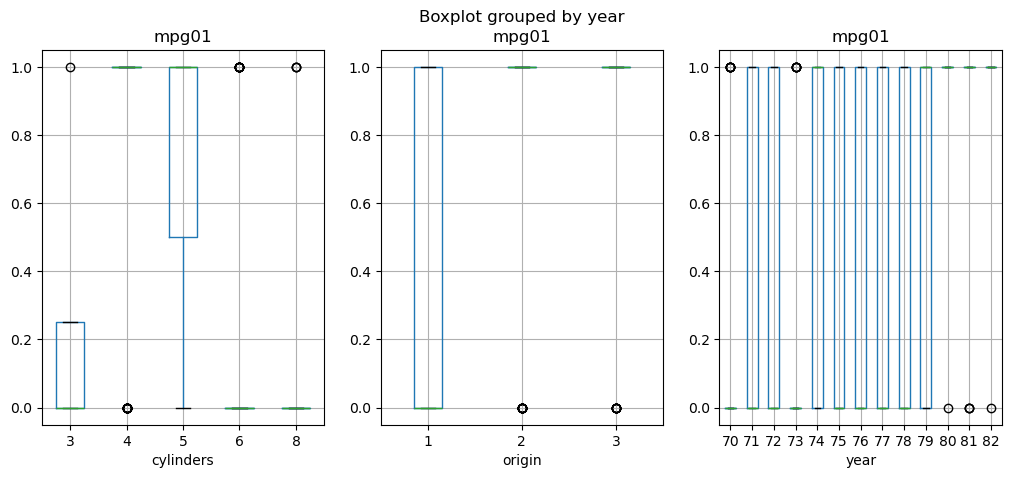

In [11]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype = 'category')
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))
axes = axes.flatten()
Auto.boxplot('mpg01', by = 'cylinders', ax = axes[0])
Auto.boxplot('mpg01', by = 'origin', ax = axes[1])
Auto.boxplot('mpg01', by = 'year', ax = axes[2])

In [12]:
"""
origin and year does not seem to have much importance looking at box plots
displacement, horsepower, weight seem to have negative impact
acceleration - positive impact
lesser number of cylinders - less mpg
"""

'\norigin and year does not seem to have much importance looking at box plots\ndisplacement, horsepower, weight seem to have negative impact\nacceleration - positive impact\nlesser number of cylinders - less mpg\n'

In [13]:
# if train size is not mentioned, the default test size will be set as 0.25
X = Auto[Auto.columns.drop(['mpg01'])]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,          # 30% for testing, 70% for training
    random_state = 42,        # Ensures the split is the same every time
    stratify = y              # Ensures class distribution is maintained
)

In [14]:
def test_err(confusion_matrix):
    test_err = (confusion_matrix[0][1] + confusion_matrix[1][0]) / confusion_matrix.sum().sum()
    return test_err

In [15]:
lda = LDA(store_covariance = True)
lda.fit(X_train,y_train)
lda_pred = lda.predict(X_test)
confusion_matrix = confusion_table(lda_pred, y_test);
test_err(confusion_matrix)

np.float64(0.07627118644067797)

In [16]:
lda.coef_

array([[-1.18128342,  0.00552994,  0.01805175, -0.00334484,  0.09047713,
         0.2724241 ,  0.3684138 ]])

In [17]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [18]:
# performing again with only selected columns 
predictors = ['horsepower', 'weight', 'displacement', 'cylinders'] # 0.110
# predictors = ['cylinders', 'year', 'origin', 'acceleration'] # gives the test error rate 0.076. 
X = Auto[predictors]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,          # 30% for testing, 70% for training
    random_state = 42,        # Ensures the split is the same every time
    stratify = y              # Ensures class distribution is maintained
)

In [19]:
lda.fit(X_train,y_train)
lda_pred = lda.predict(X_test)
confusion_matrix = confusion_table(lda_pred, y_test);
test_err(confusion_matrix)

np.float64(0.11016949152542373)

In [20]:
"""
after using only these predictors, the error rate went up
the lowest error rate might be because of overfitting. overall (1.00 - 0.11 = 0.89) 89% accuracy is not bad
"""

'\nafter selecting these few predictors, the error rate went up\n'

In [21]:
qda = QDA(store_covariance = True)
qda.fit(X_train,y_train)
qda_pred = lda.predict(X_test)
confusion_matrix_qda = confusion_table(qda_pred, y_test);
test_err(confusion_matrix_qda)

np.float64(0.11016949152542373)

In [25]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
logit_pred = logit.predict(X_test)
confusion_matrix_logit = confusion_table(logit_pred, y_test);
test_err(confusion_matrix_logit)

np.float64(0.11864406779661017)

In [22]:
NB = GaussianNB()
NB.fit(X_train,y_train)
NB_pred = NB.predict(X_test)
confusion_matrix_NB = confusion_table(NB_pred, y_test);
test_err(confusion_matrix_NB)

np.float64(0.1016949152542373)

In [28]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    confusion_matrix_knn = confusion_table(knn_pred, y_test);    
    print("k  = ", k)
    print(test_err(confusion_matrix_knn))
    print()

k  =  1
0.1440677966101695

k  =  2
0.16101694915254236

k  =  3
0.11864406779661017

k  =  4
0.13559322033898305

k  =  5
0.11016949152542373

k  =  6
0.09322033898305085

k  =  7
0.1016949152542373

k  =  8
0.11016949152542373

k  =  9
0.11864406779661017

k  =  10
0.1271186440677966

k  =  11
0.11016949152542373

k  =  12
0.11864406779661017

k  =  13
0.11016949152542373

k  =  14
0.11864406779661017

k  =  15
0.11016949152542373

k  =  16
0.1016949152542373

k  =  17
0.1016949152542373

k  =  18
0.1016949152542373

k  =  19
0.1016949152542373



In [ ]:
"""
NB > LDA QDA > Logistic (good result in the order)
k = 6 produces good result. it also exceeds in the performance of other parametric approaches
"""